In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Import

Import data from csv

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

## Missing Data
Explore the missing data from training data set.

<Axes: >

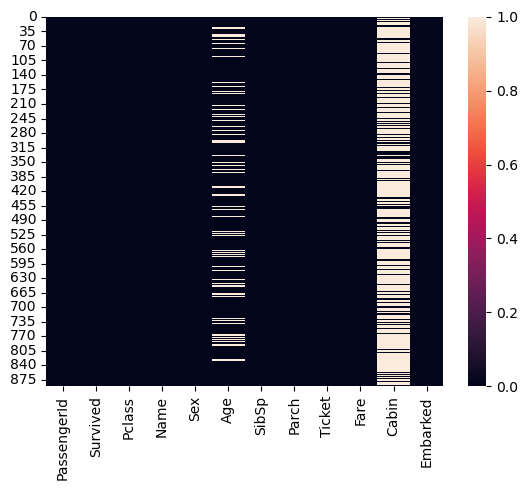

In [7]:
sns.heatmap(train.isnull())

In [8]:
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

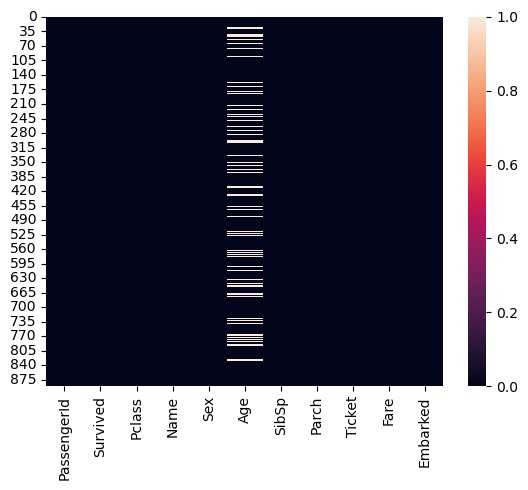

In [9]:
sns.heatmap(train.isnull())

In [19]:
train['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [20]:
train['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

/var/folders/05/3cc8tw755_5g9gvwckrlwwmc0000gn/T/ipykernel_51445/4036100352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr().abs(),vmin=0, vmax=1, cmap='viridis_r')


<Axes: >

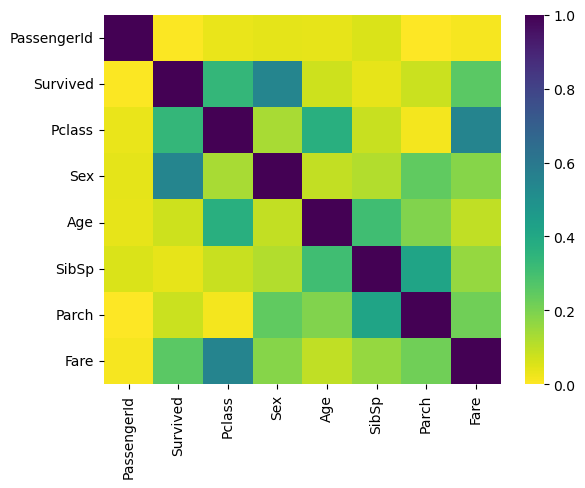

In [26]:
sns.heatmap(train.corr().abs(),vmin=0, vmax=1, cmap='viridis_r')

In [29]:
train['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [32]:
train.drop('Ticket', axis = 1, inplace= True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


# Missing Data: Embarked

In [40]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,80.0,NaN


With the data from Encyclopedia Titanica, we fill in the missing Embarked data for two passengers.

In [46]:
train.loc[829, 'Embarked'] = 'S'

In [49]:
train.loc[61, 'Embarked'] = 'S'

# Missing Data: Age

<Axes: xlabel='Pclass', ylabel='Age'>

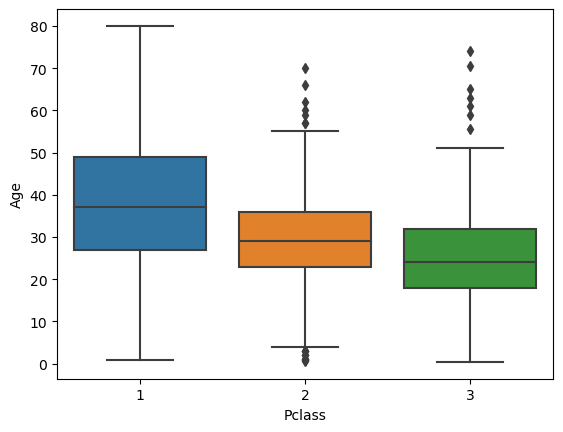

In [51]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [53]:
def predict_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        DICT = {1:37, 2:29, 3:24}
        return DICT[Pclass]
    else:
        return Age

In [54]:
train['Age'] = train[['Age','Pclass']].apply(predict_age,axis=1)